# 線形回帰 (liner regression)

利益を予想するシンプルな線形回帰モデル

レストランのオーナーでいろいろな街で店を出しています。
各街での人口と利益のデータを持っています。 新しい街にレストランを出すときに、人口から利益を予測してみます。

ライブラリの読み込み

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
rand = np.random

import warnings
warnings.filterwarnings('ignore')

データの取得

In [2]:
path = '../data/ex1data1.txt'
df = pd.read_csv(path, header=None, names=['Population', 'Profit'])
n_samples = df.shape[0] # トレーニングデータ数

データの表示。欠測値の確認

In [3]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


ヒストグラムの表示

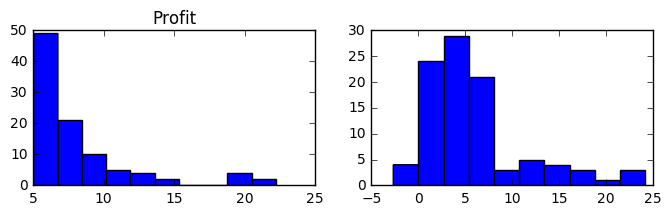

In [4]:
fig = plt.figure(figsize=(8, 2))
plot1 = fig.add_subplot(1, 2, 1)
plot2 = fig.add_subplot(1, 2, 2)

plot1.hist(df['Population'])
plot1.set_title('Population')
plot2.hist(df['Profit'])
plot1.set_title('Profit')
plt.show()

トレーニングデータのプロット

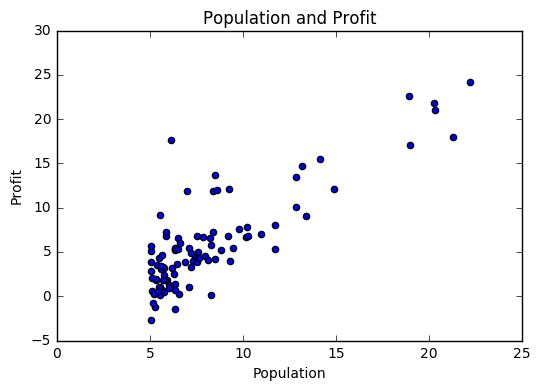

In [5]:
plt.scatter(df['Population'], df['Profit'])
plt.title('Population and Profit')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

入力 x (特徴)、y (正解) の定義

In [6]:
x = tf.placeholder("float", name='input_x')
y = tf.placeholder("float", name='input_y')

学習する変数のaとbの定義。初期値はランダムな正規分布で初期化

In [7]:
a = tf.Variable(rand.randn(), name="weight")
b  = tf.Variable(rand.randn(), name="bias")

線形モデルの定義

$$
y_{pred} = ax + b
$$

In [8]:
y_pred = tf.add(tf.mul(a, x), b)

2乗和誤差(mean squared error)の定義

$$
E = \frac {1}{2m} \sum_{i=1}^m (y_{pred_i} - y_i )^2
$$

In [9]:
cost = tf.reduce_sum(tf.pow(y_pred - y, 2)) / (2 * n_samples)

勾配降下(Gradient Descent)の定義

In [10]:
optimizer = tf.train.GradientDescentOptimizer(0.01) # 学習率 0.01
update = optimizer.minimize(cost)

グラフを起動して、トレーニングを実施

In [11]:
feature = df['Population']
label = df['Profit']
hist = [] # 結果を保持

# セッション開始
sess = tf.InteractiveSession()

# 変数の初期化
sess.run(tf.initialize_all_variables()) # たぶん、tf 0.12から global_variables_initializer()

# エポック数: 1000
for epoch in range(1000):
    for (x_all, y_all) in zip(feature, label):
        sess.run(update, feed_dict={x: x_all, y: y_all}) # placeholder X, Y  にデータをセットして勾配を計算する

    # 100エポックごとにコストを表示
    if (epoch+1) % 100 == 0:
        cost_v, a_v, b_v = sess.run([cost, a, b], feed_dict={x: x_all, y: y_all})
        hist.append(cost_v)
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(cost_v), \
                  "a=", a_v, "b=", b_v)

print("Finish")

Epoch: 0100 cost= 0.058292724 a= 0.79728 b= -0.354827
Epoch: 0200 cost= 0.049573556 a= 0.855819 b= -0.934783
Epoch: 0300 cost= 0.042842824 a= 0.904632 b= -1.41837
Epoch: 0400 cost= 0.037605729 a= 0.945334 b= -1.82161
Epoch: 0500 cost= 0.033499669 a= 0.979273 b= -2.15786
Epoch: 0600 cost= 0.030257532 a= 1.00757 b= -2.43822
Epoch: 0700 cost= 0.027679957 a= 1.03117 b= -2.67202
Epoch: 0800 cost= 0.025618609 a= 1.05085 b= -2.86695
Epoch: 0900 cost= 0.023960767 a= 1.06725 b= -3.02949
Epoch: 1000 cost= 0.022620622 a= 1.08093 b= -3.16503
Finish


予測

In [12]:
predictions = sess.run(y_pred, feed_dict={ x: feature })

データのプロットと線形回帰モデルのプロット

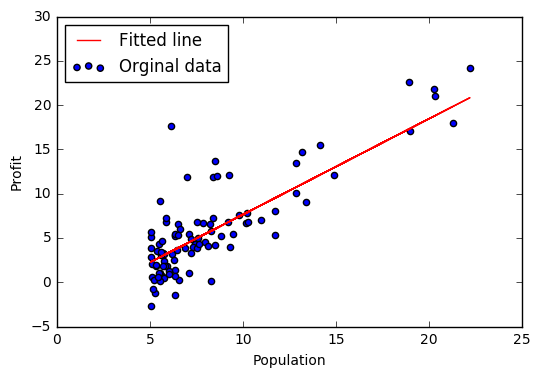

In [13]:
plt.scatter(feature, label, label="Orginal data")
plt.plot(feature, predictions, c='r', label="Fitted line")
plt.legend(loc='upper left')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

学習曲線のプロット

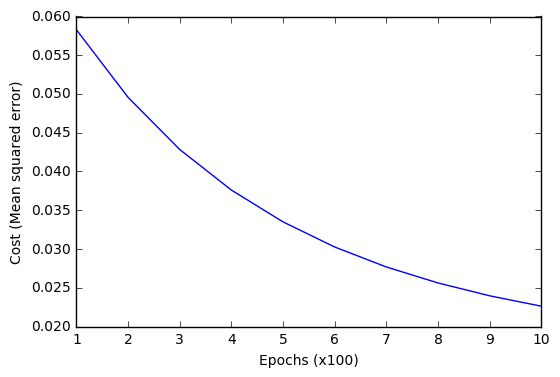

In [14]:
epochx100 = range(1, len(hist) + 1, 1)
plt.plot(epochx100, hist)
plt.xlabel('Epochs (x100)')
plt.ylabel('Cost (Mean squared error)')
plt.show()